# Analysis & Visualization of COVID-19 in Alberta

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

## Read the dataset
Dataset is sourced from the Government of Canada's [COVID-19 daily epidemiology update](https://health-infobase.canada.ca/covid-19/epidemiological-summary-covid-19-cases.html). Dataset is downloaded from [here](https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv). The dataset contains daily COVID-19 cases for the Canadian provinces and territories.

---

Interesting columns in dataset:

*   prname, Province nam
*   date, Report date
*   numconf, Number of confirmed cases
*   numdeaths, Number of deaths
*   numtotal, Total number of cases, "Calculated by number of confirmed cases plus number of probable cases 
(numconf+numprob) "
*   numtested, Number of individuals tested
*   numrecover, Number of recovered cases
*   percentrecover, Percentage of recovered cases
*   ratetested, Testing rate per  one million population, "Calculated by the number of individuals tested for a P/T divided by the population of that P/T
[(numtested/population) x1,000,000]"
*   numtoday, Number of new cases since last update, Number of total counts from last update subtracted from total counts of current update
*   percentoday, Percent change since last update, "Calculated by the number of new cases divided by the previous update's total number of cases
[(numtoday/numtotal of previous update)x100]"
*   ratetotal, Case rate per one hundred thousand population, "Calculated by the total number of cases for a P/T divided by the population of that P/T
[(numtotal/population) x100,000]"








In [2]:
url = 'https://health-infobase.canada.ca/src/data/covidLive/covid19-download.csv'
df = pd.read_csv(url)

Filter dataset to Alberta

In [3]:
alberta_df = df[df['prname'] == 'Alberta'].copy()
alberta_df.tail(5)

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,numtests,numrecover,percentrecover,ratetested,ratetests,numtoday,percentoday,ratetotal,ratedeaths,numdeathstoday,percentdeath,numtestedtoday,numteststoday,numrecoveredtoday,percentactive,numactive,rateactive,numtotal_last14,ratetotal_last14,numdeaths_last14,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
8113,48,Alberta,Alberta,2021-08-30,1.0,252010,NaN,2371.0,252010,NaN,5083796,238213.0,94.53,NaN,1149692.0,865,0.34,5699.16,53.62,7.0,0.94,NaN,9526.0,1278.0,4.53,11426.0,258.40,11664.0,263.78,38.0,0.86,7041.0,159.23,23.0,0.52,1006.0,22.75,3.0,0.07,28.90
8128,48,Alberta,Alberta,2021-08-31,1.0,252930,NaN,2375.0,252930,NaN,5092124,238895.0,94.45,NaN,1151575.0,920,0.37,5719.97,53.71,4.0,0.94,NaN,8328.0,682.0,4.61,11660.0,263.69,12177.0,275.38,39.0,0.88,7332.0,165.81,20.0,0.45,1047.0,23.69,3.0,0.06,15.42
8143,48,Alberta,Alberta,2021-09-01,1.0,254245,NaN,2383.0,254245,NaN,5099611,239572.0,94.23,NaN,1153269.0,1315,0.52,5749.71,53.89,8.0,0.94,NaN,7487.0,677.0,4.83,12290.0,277.94,12814.0,289.79,45.0,1.02,7571.0,171.22,27.0,0.61,1082.0,24.46,4.0,0.09,15.31
8158,48,Alberta,Alberta,2021-09-02,1.0,255584,NaN,2388.0,255584,NaN,5112027,240328.0,94.03,NaN,1156077.0,1339,0.53,5779.99,54.00,5.0,0.93,NaN,12416.0,756.0,5.03,12868.0,291.01,13336.0,301.59,46.0,1.04,7798.0,176.35,28.0,0.63,1114.0,25.19,4.0,0.09,17.10
8173,48,Alberta,Alberta,2021-09-03,1.0,256985,NaN,2390.0,256985,NaN,5124166,241100.0,93.82,NaN,1158822.0,1401,0.55,5811.67,54.05,2.0,0.93,NaN,12139.0,772.0,5.25,13495.0,305.19,13988.0,316.34,47.0,1.06,8031.0,181.62,26.0,0.59,1147.0,25.95,4.0,0.08,17.46


## Exploratory data analysis

### Basic metrics

In [4]:
canada_df = df[df['prname'] == 'Canada'].copy()

In [5]:
latest_alberta_data = alberta_df.tail(1).copy()
latest_canada_data = canada_df.tail(1).copy()

total_deaths_alberta = latest_alberta_data['numdeaths']
active_cases_alberta = latest_alberta_data['numactive']
latest_reported_daily_cases_alberta = latest_alberta_data['numtoday']
latest_reported_daily_tests_alberta = latest_alberta_data['numteststoday']

active_cases_canada = latest_canada_data['numactive']
latest_reported_daily_cases_canada = latest_canada_data['numtoday']
latest_reported_daily_tests_canada = latest_canada_data['numteststoday']

compare_active_cases = (float(active_cases_alberta) / float(active_cases_canada)) * 100
compare_latest_reported_daily_cases = (float(latest_reported_daily_cases_alberta) / float(latest_reported_daily_cases_canada)) * 100

latest_positivity_rate_alberta = (float(latest_reported_daily_cases_alberta) / float(latest_reported_daily_tests_alberta)) * 100
latest_positivity_rate_canada = (float(latest_reported_daily_cases_canada) / float(latest_reported_daily_tests_canada)) * 100

alberta_population = 4444277
canada_population = 38131104
alberta_canada_percentage = (alberta_population / canada_population) * 100

diff = compare_active_cases / alberta_canada_percentage

print("Total deaths in Alberta is {:.0f}\n".format(float(total_deaths_alberta)))
print("Active cases in Alberta is {:.0f}".format(float(active_cases_alberta)))
print("Active cases in Canaada {:.0f}".format(float(active_cases_canada)))
print("Alberta makes up {:.1f}% of the active cases in Canada\n".format(compare_active_cases))

print("Latest reported daily cases in Alberta is {:.0f}".format(float(latest_reported_daily_cases_alberta)))
print("Latest reported daily cases in Canada is {:.0f}".format(float(latest_reported_daily_cases_canada)))
print("Alberta makes up {:.1f}% of the latest reported daily cases in Canada\n".format(compare_latest_reported_daily_cases))

print("Latest reported daily tests in Alberta is {:.0f}".format(float(latest_reported_daily_tests_alberta)))
print("Latest positivity rate in Alberta is {:.1f}%".format(latest_positivity_rate_alberta))
print("Latest positivity rate in Canada is {:.1f}%\n".format(latest_positivity_rate_canada))

print("Alberta is {:.1f}% of Canada's population and has {:.1f}% of the active cases in Canada".format(alberta_canada_percentage, compare_active_cases))
print("Active cases in Alberta is {:.1f}x higher relative to the province's population".format(diff))



Total deaths in Alberta is 2390

Active cases in Alberta is 13495
Active cases in Canaada 34656
Alberta makes up 38.9% of the active cases in Canada

Latest reported daily cases in Alberta is 1401
Latest reported daily cases in Canada is 4161
Alberta makes up 33.7% of the latest reported daily cases in Canada

Latest reported daily tests in Alberta is 12139
Latest positivity rate in Alberta is 11.5%
Latest positivity rate in Canada is 4.7%

Alberta is 11.7% of Canada's population and has 38.9% of the active cases in Canada
Active cases in Alberta is 3.3x higher relative to the province's population


### Visualization

In [6]:
# Remove data errors
alberta_df = alberta_df[alberta_df['numtoday'] != 0]

In [7]:
dates = alberta_df['date']
date_format = [pd.to_datetime(d) for d in dates]

In [8]:
# Calculate positivity rate and 7 day rolling means for cases, tests, and positivity rate

alberta_df['numtoday_7avg'] = alberta_df['numtoday'].rolling(7).mean()
alberta_df['numteststoday_7avg'] = alberta_df['numteststoday'].rolling(7).mean()
alberta_df['positivity_rate_7avg'] = (alberta_df['numtoday_7avg'] / alberta_df['numteststoday_7avg']) * 100

alberta_df['positivity_rate'] = (alberta_df['numtoday'] / alberta_df['numteststoday']) * 100

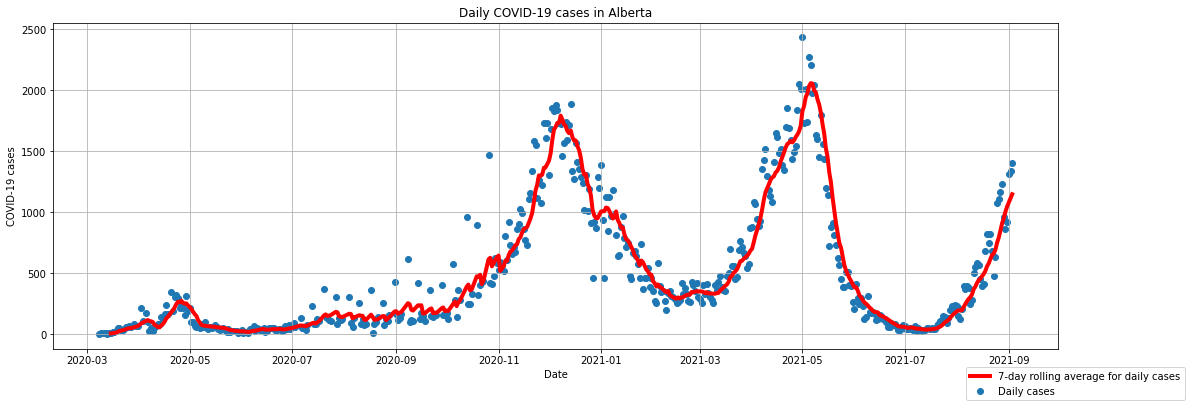

In [9]:
fig, ax = plt.subplots(figsize=(18,6))
ax.grid()
ax.scatter(date_format, alberta_df['numtoday'], label = 'Daily cases')
ax.plot(date_format, alberta_df['numtoday_7avg'], color = 'red', linewidth = 4, label = '7-day rolling average for daily cases')
ax.set(title = 'Daily COVID-19 cases in Alberta', xlabel = 'Date', ylabel = 'COVID-19 cases')
fig.legend(loc = 'lower right')
fig.show()

Positivity rate provides an alternative view of the COVID-19's progression. Using the 7 day rolling averages smooths out unwanted data anomalies.

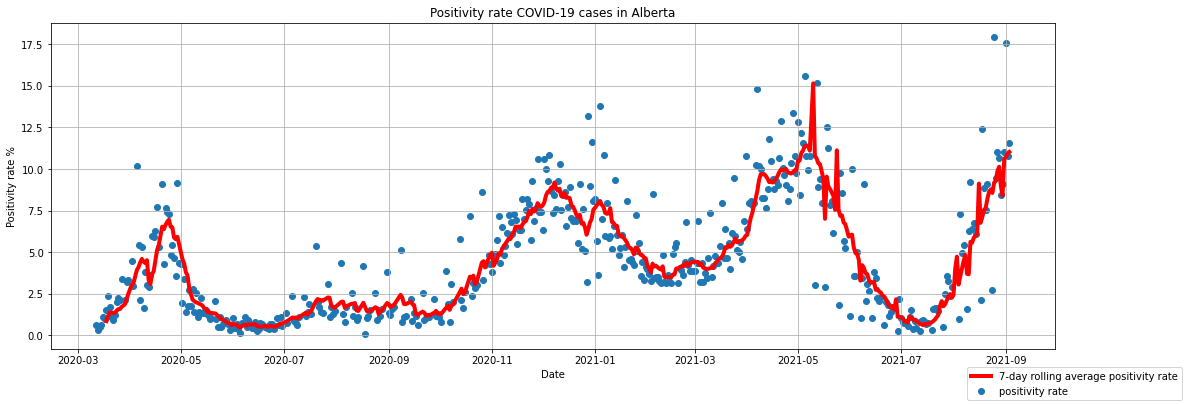

In [10]:
fig, ax = plt.subplots(figsize=(18,6))
ax.grid()
ax.scatter(date_format, alberta_df['positivity_rate'], label = 'positivity rate')
ax.plot(date_format, alberta_df['positivity_rate_7avg'], color = 'red', linewidth = 4, label = '7-day rolling average positivity rate')
ax.set(title = 'Positivity rate COVID-19 cases in Alberta', xlabel = 'Date', ylabel = 'Positivity rate %')
fig.legend(loc = 'lower right')
fig.show()

Correlation between positivity rate and active cases

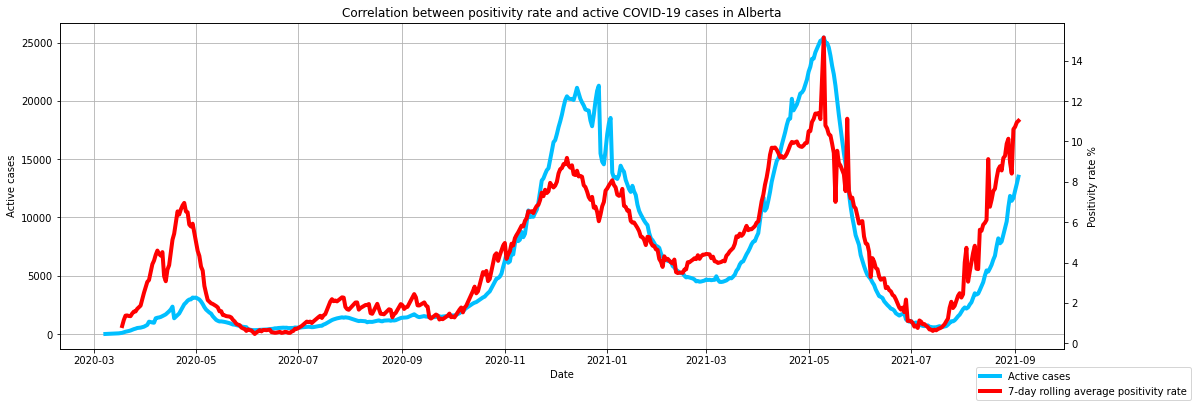

In [11]:
fig, ax1 = plt.subplots(figsize=(18,6))
ax1.grid()
ax1.plot(date_format, alberta_df['numactive'], color = 'deepskyblue', linewidth = 4, label = 'Active cases')
ax1.set(title = 'Correlation between positivity rate and active COVID-19 cases in Alberta', xlabel = 'Date', ylabel = 'Active cases')

ax2 = ax1.twinx()
ax2.set_ylabel('Positivity rate %')
ax2.plot(date_format, alberta_df['positivity_rate_7avg'], color = 'red', linewidth = 4, label = '7-day rolling average positivity rate')

fig.legend(loc = 'lower right')
plt.show()